In [19]:
import matplotlib.pyplot as plt
import numpy as np

Define the logistic map as an anonymous function.

$x_{n+1} = r x_n (1 - x_n)$,

where $x_n \in [0,1]$, $r \in [0,4]$.

In [1]:
LogisticMap = lambda x, r: r*x*(1.0-x)

In [2]:
def Iterate(g, x0, N, args=()):
    """
    Iterate the passed 1D function g N times, using x0 as the initial value.
    The parameters are passed as a tuple that is unpacked and appended to the arguments of g.
    """
    for i in range(N):
        x0 = g(x0, *args)
    return x0

In [76]:
def FindAttractors(r,x0,M):       
    """ Finds at most M attractors of the LogisticMap at parameter r starting at x0
        We assume the iteration converges in itersteps"""
    itersteps = 100
    result = [] # initialize an empty result list
    for i in range(M):
        result.append(Iterate(LogisticMap, x0, itersteps+i, (r,)))
    return result

In [78]:
""" 1 fixed point"""
rtmp = 1.5
FindAttractors(rtmp,0.5,4)

[0.33333333333333337,
 0.3333333333333333,
 0.33333333333333337,
 0.3333333333333333]

In [79]:
""" 2 fixed points"""
rtmp = 3.2
FindAttractors(rtmp,0.5,4)

[0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701]

In [80]:
""" chaos"""
rtmp = 3.7
FindAttractors(rtmp,0.5,4)

[0.3158044623339584,
 0.7994664144444962,
 0.5931835064931018,
 0.8928722862353053]

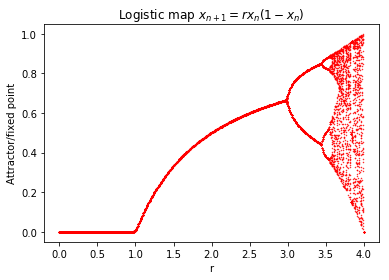

In [94]:
x0 = 0.5 # initial value 
maxa = 40 # maximum number of fixed points that we search for for a given r
attractor = []
x = np.linspace(0,4,440) # values of r

for r in x:    
    attractor.append(FindAttractors(r,x0,maxa))

for xe, ye in zip(x, attractor):
    plt.scatter([xe] * len(ye), ye,s=0.2,c='r')    

plt.ylabel('Attractor/fixed point')
plt.xlabel('r')
plt.title('Logistic map $x_{n+1} = r x_n (1 - x_n)$')
plt.savefig('LM.png')
plt.show()